# 08 XMLs from Geofabrik

Note: gdf_from_xml() only filters by tags at the end of the process. This means it converts everything in the XML to geometries in a GeoDataFrame before filtering. This may mean that osmnx runs out of memory when handling larger XMLs even when only creating a very small number of final geometries. For that reason only small XMLs from Geofabrik can be processed. The XMLs processed are not included in the repository but are available from:

https://download.geofabrik.de/europe.html

In [1]:
%load_ext autoreload
%autoreload 2

import osmnx as ox # using fork `New geometries module - Work In Progress`
ox.utils.config(use_cache=True, log_console=True)

import geopandas as gpd
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

from carto_type_plot import carto_plot

## Andorra

https://www.openstreetmap.org/#map=11/42.5455/1.6177

In [2]:
andorra = ox.gdf_from_xml('XML/geofabrik/andorra-latest.osm')

<AxesSubplot:>

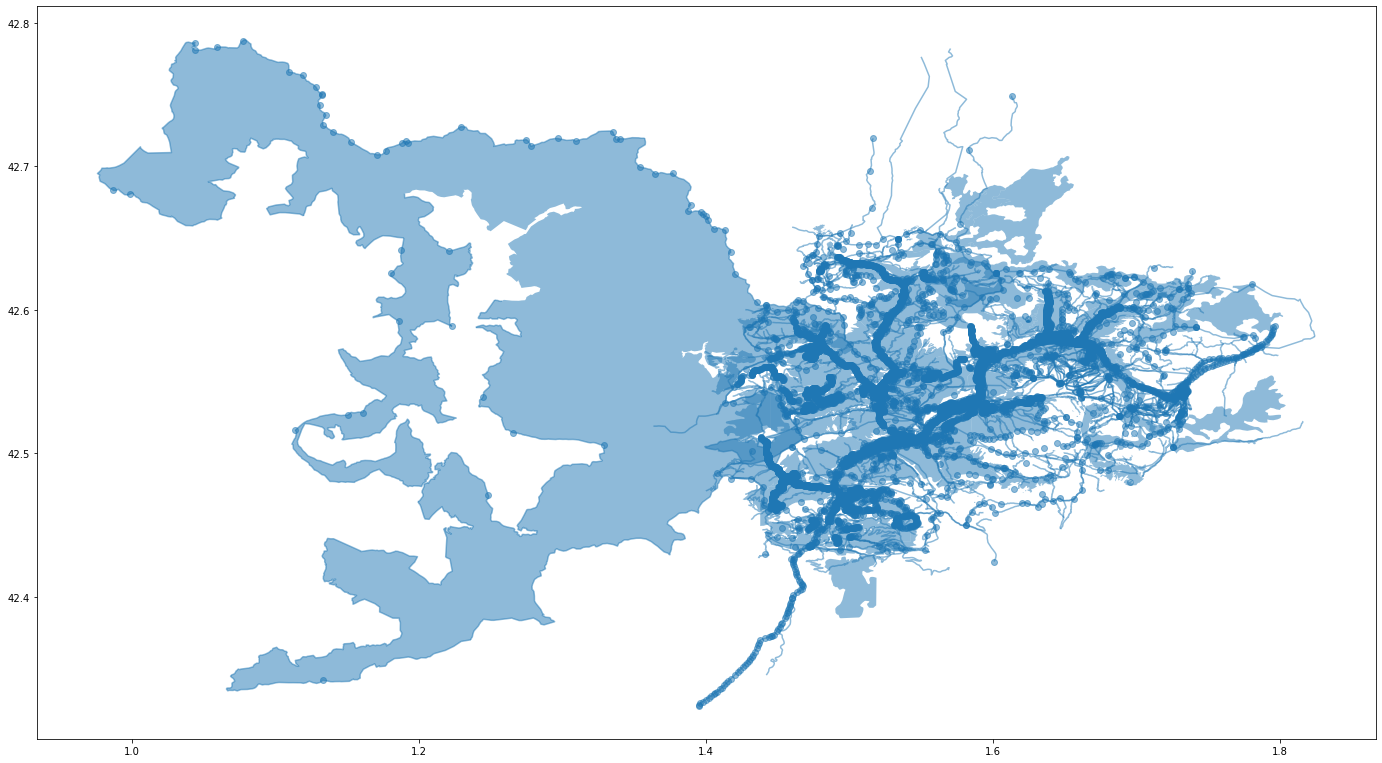

In [3]:
andorra.plot(figsize=(24,24), alpha=0.5)

/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarn

(<Figure size 1728x1728 with 1 Axes>, <AxesSubplot:>)

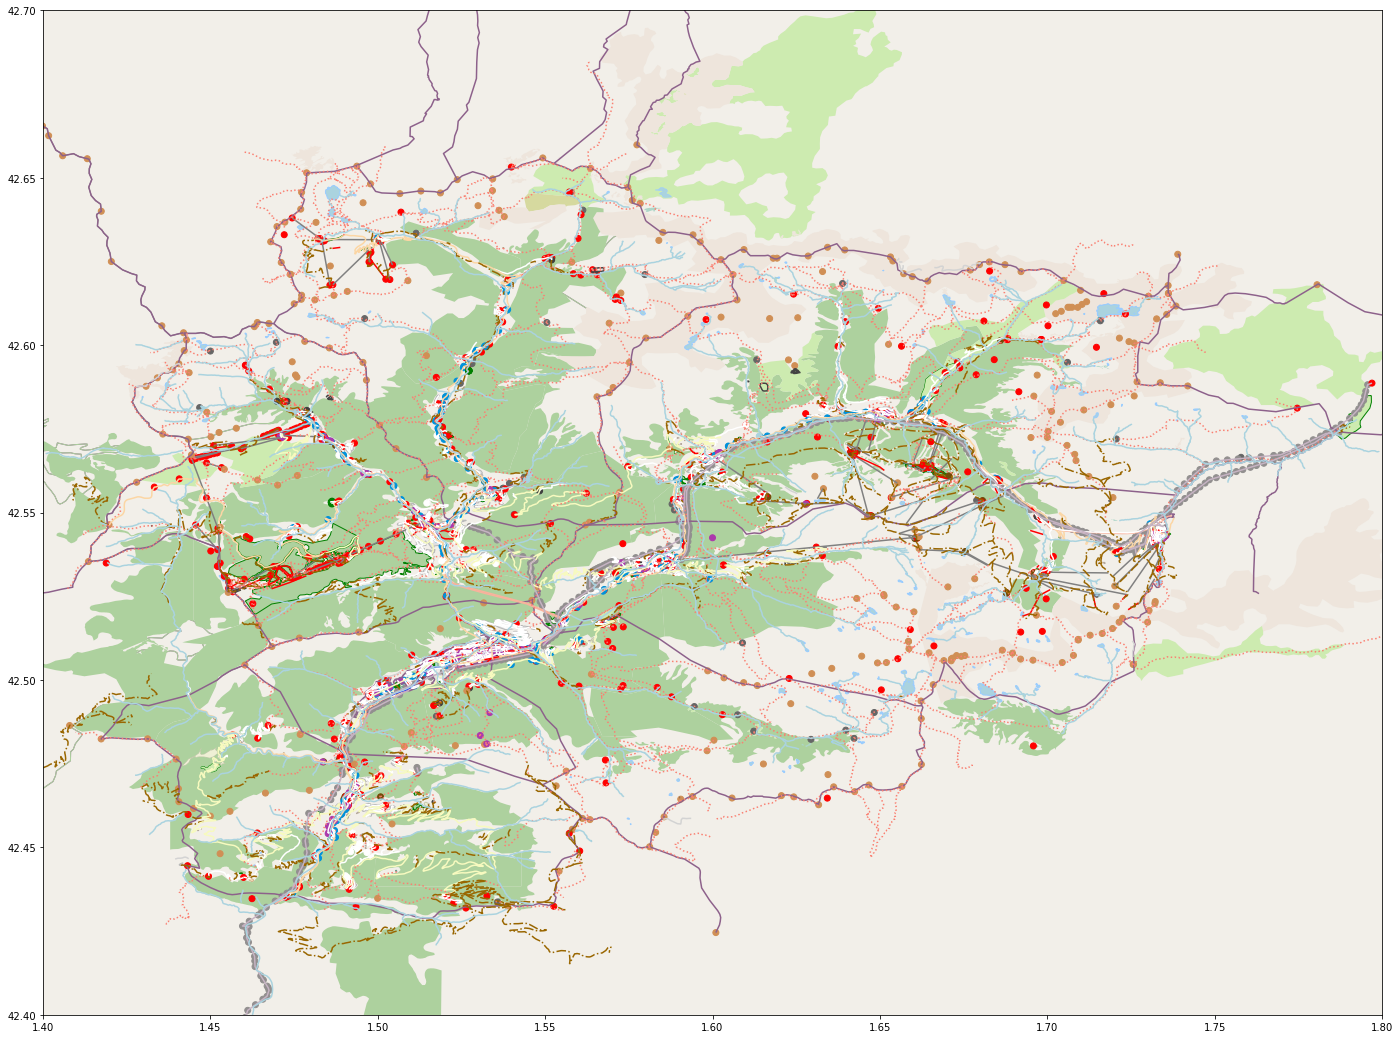

In [5]:
carto_plot(andorra, top=42.7, bottom=42.4, left=1.4, right=1.8)

## Faroe Islands

https://www.openstreetmap.org/#map=9/61.8911/-6.8362

In [2]:
faroe_islands = ox.gdf_from_xml('XML/geofabrik/faroe-islands-latest.osm')

/home/nick/GitHub/osmnx/osmnx/geometries.py:891: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  gdf = gdf[~(gdf["geometry"].isna() | gdf["geometry"].is_empty)].copy()


<AxesSubplot:>

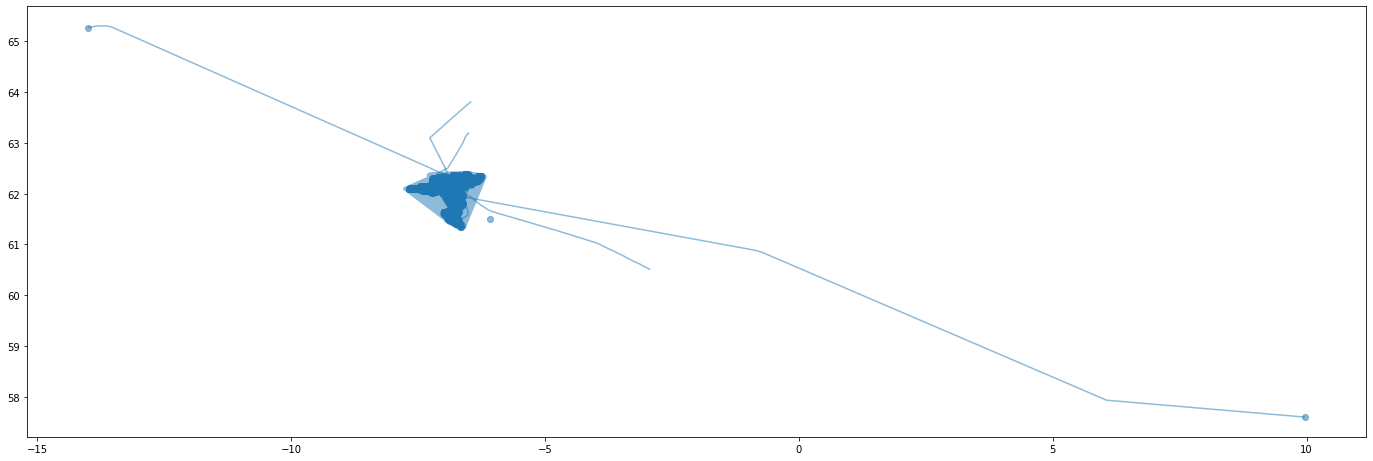

In [3]:
faroe_islands.plot(figsize=(24,24), alpha=0.5)

/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarn

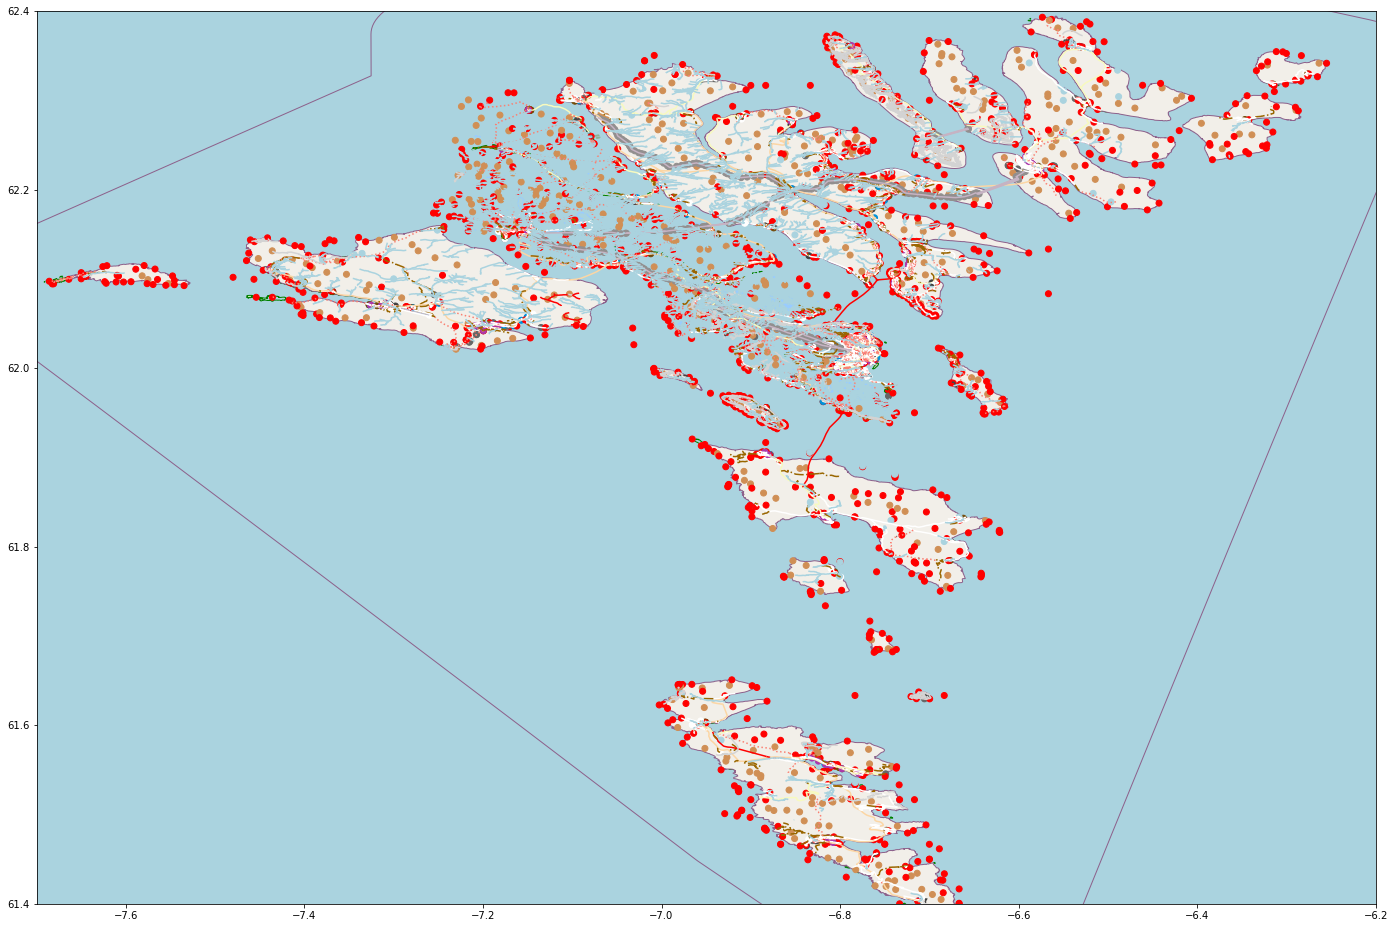

In [4]:
fig,ax = carto_plot(faroe_islands, top=62.4, bottom=61.4, left=-7.7, right=-6.2)
ax.set_facecolor('#aad3df')

#### Notes:

- the central island was not created because bits of geometry are missing around -7.05, 62.25
- searching the xml for node/7813627969 for example finds the reference to it from way/159546033 but doesn't find the node itself
- the issue is with the xml rather than the processing.
- the tag 'natural': 'coastline' is on the line fragments not on the relation - filling these doesn't make any sense
- querying the overpass api for 'place': 'island' does create the full polygon for the islands

<AxesSubplot:>

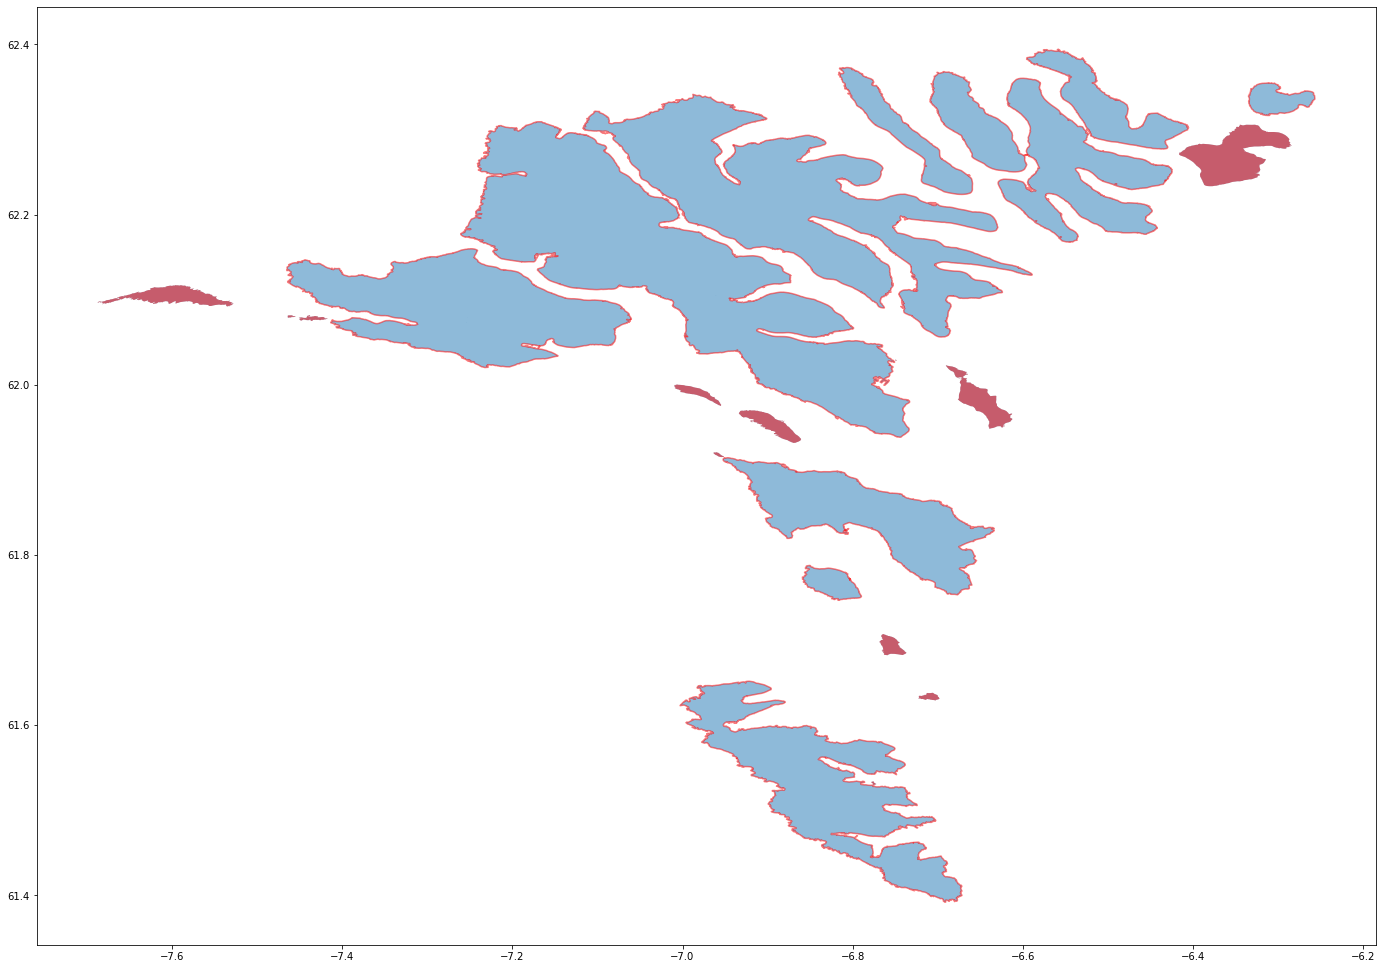

In [5]:
faroe_islands_overpass = ox.gdf_from_place('faroe islands', tags={'natural': 'coastline', 'place': 'island'})
ax = faroe_islands_overpass[~faroe_islands_overpass['place'].isna()].plot(figsize=(24,24), alpha=0.5)
faroe_islands_overpass[~faroe_islands_overpass['natural'].isna()].plot(ax=ax, alpha=0.5, color='red')

## Guernsey

In [2]:
guernsey_jersey = ox.gdf_from_xml('XML/geofabrik/guernsey-jersey-latest.osm')

/home/nick/GitHub/osmnx/osmnx/geometries.py:891: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  gdf = gdf[~(gdf["geometry"].isna() | gdf["geometry"].is_empty)].copy()


<AxesSubplot:>

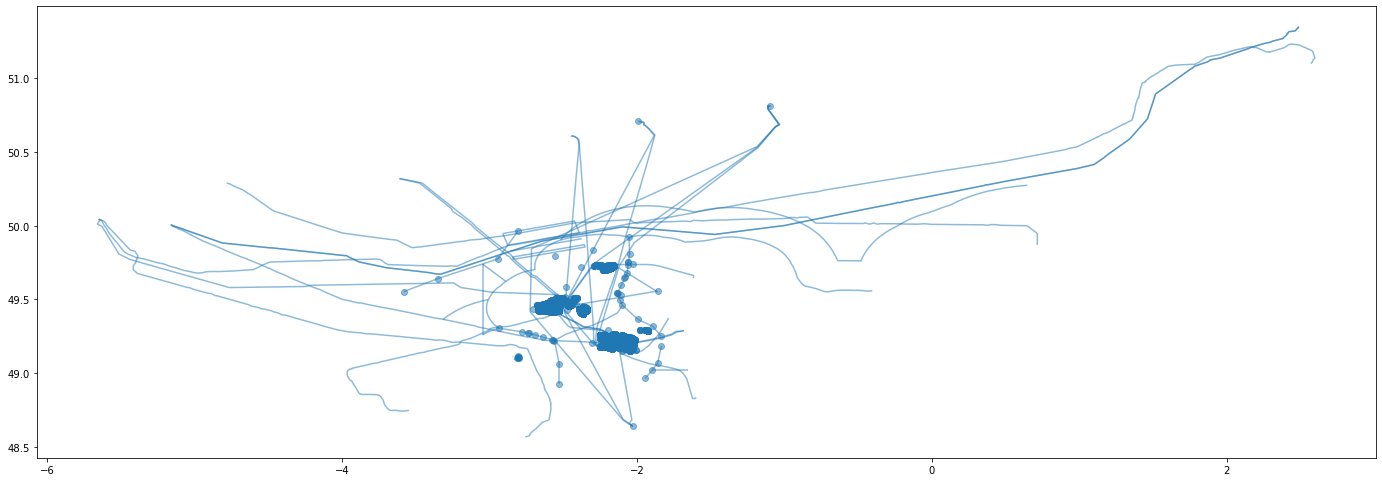

In [10]:
guernsey_jersey.plot(figsize=(24,24), alpha=0.5)

/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarn

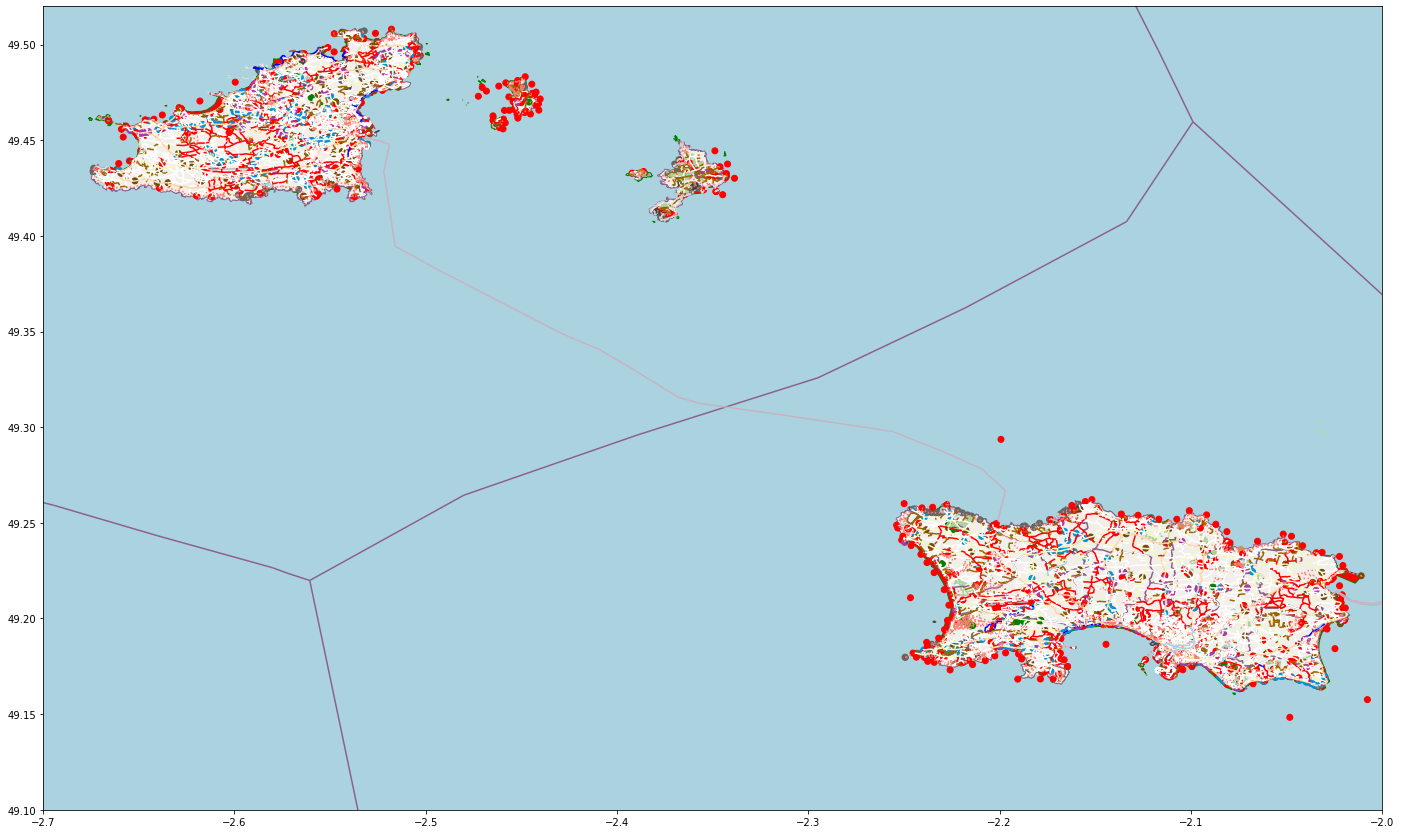

In [11]:
fig,ax = carto_plot(guernsey_jersey, left=-2.7, right=-2, bottom=49.1, top=49.52)
ax.set_facecolor('#aad3df')

## Liechtenstein

https://www.openstreetmap.org/#map=12/47.1505/9.5869

In [12]:
liechtenstein = ox.gdf_from_xml('XML/geofabrik/liechtenstein-latest.osm')

<AxesSubplot:>

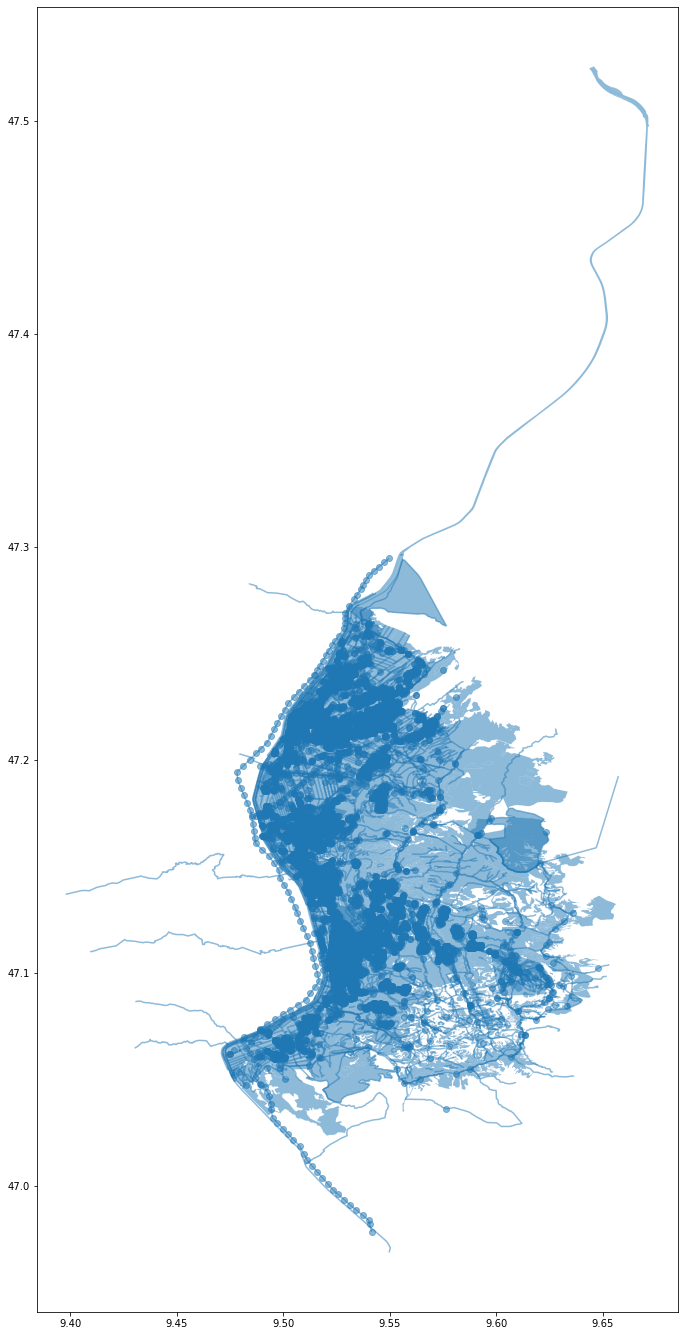

In [13]:
liechtenstein.plot(figsize=(24,24), alpha=0.5)

/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarn

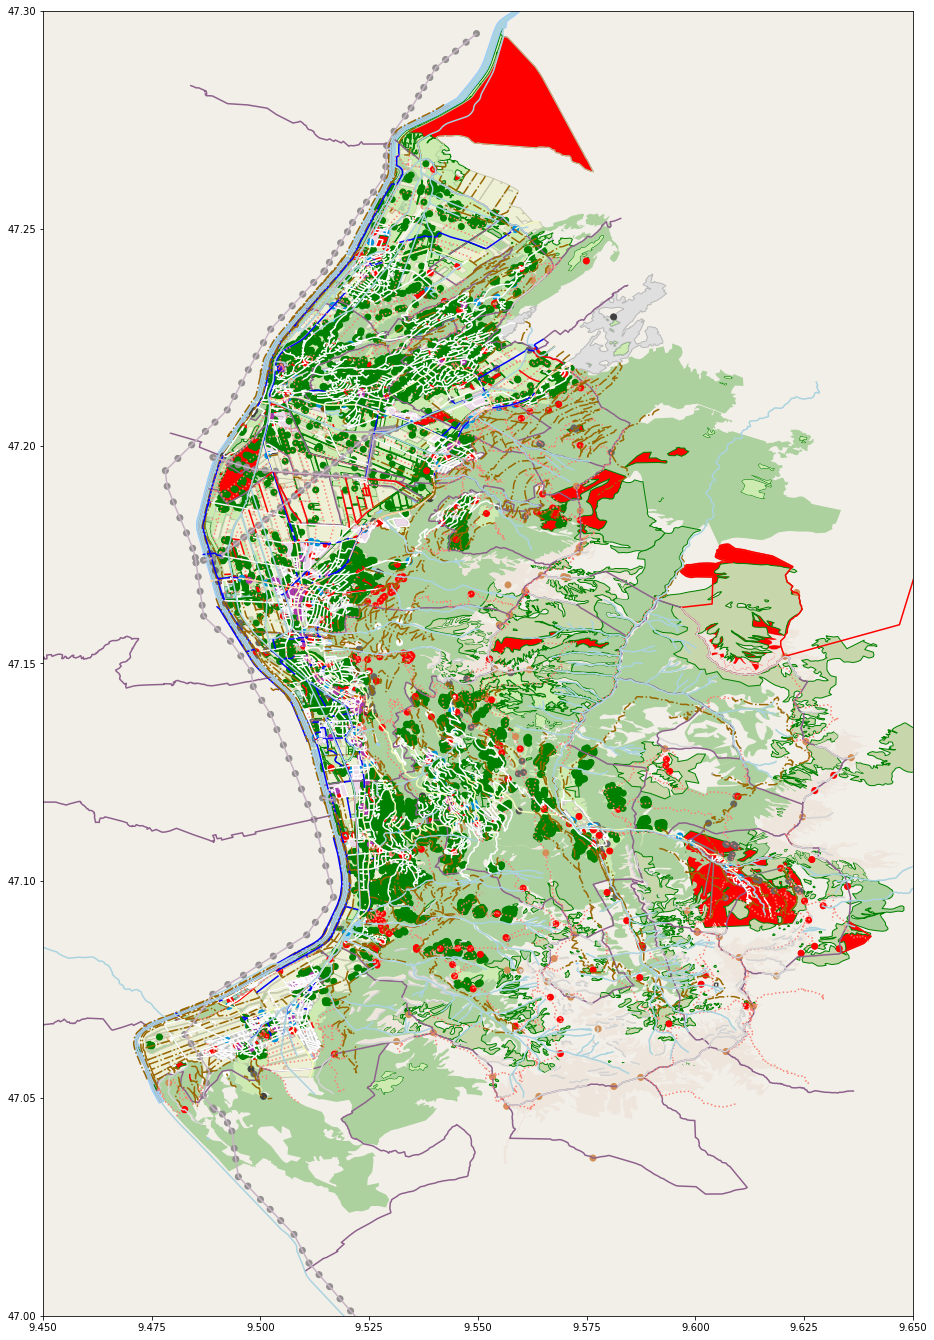

In [16]:
fig,ax = carto_plot(liechtenstein, bottom=47, top=47.3, left=9.45, right=9.65)

## Monaco

https://www.openstreetmap.org/#map=15/43.7381/7.4209

In [18]:
monaco = ox.gdf_from_xml('XML/geofabrik/monaco-latest.osm')

<AxesSubplot:>

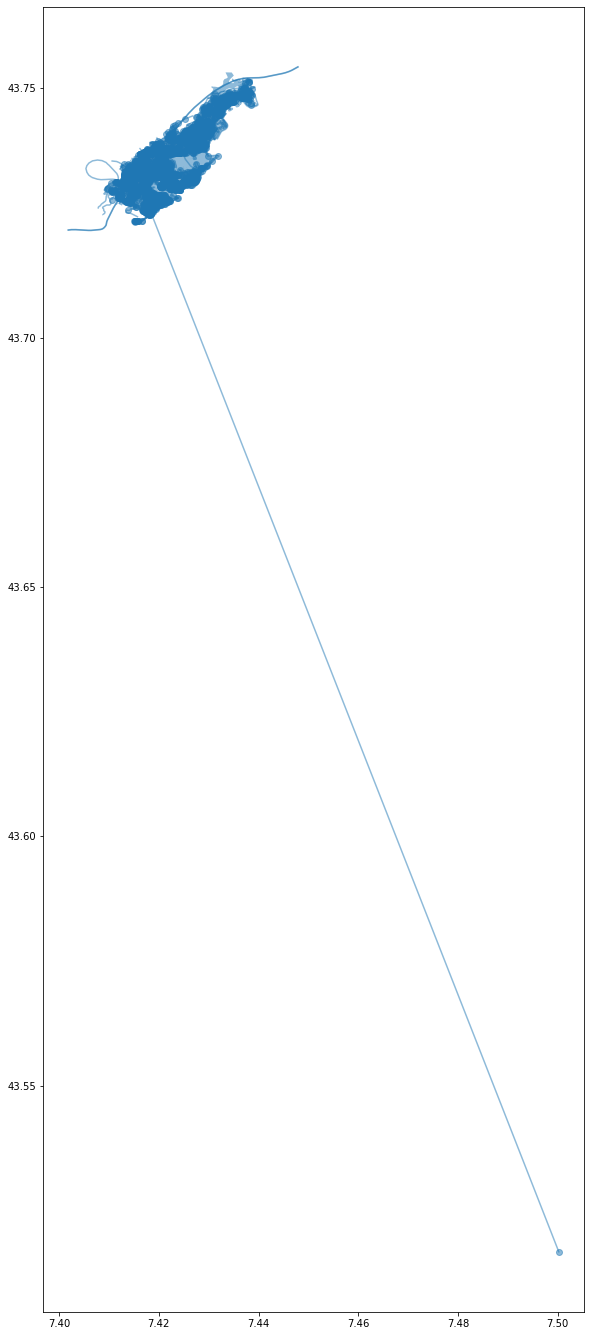

In [19]:
monaco.plot(figsize=(24,24), alpha=0.5)

/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarn

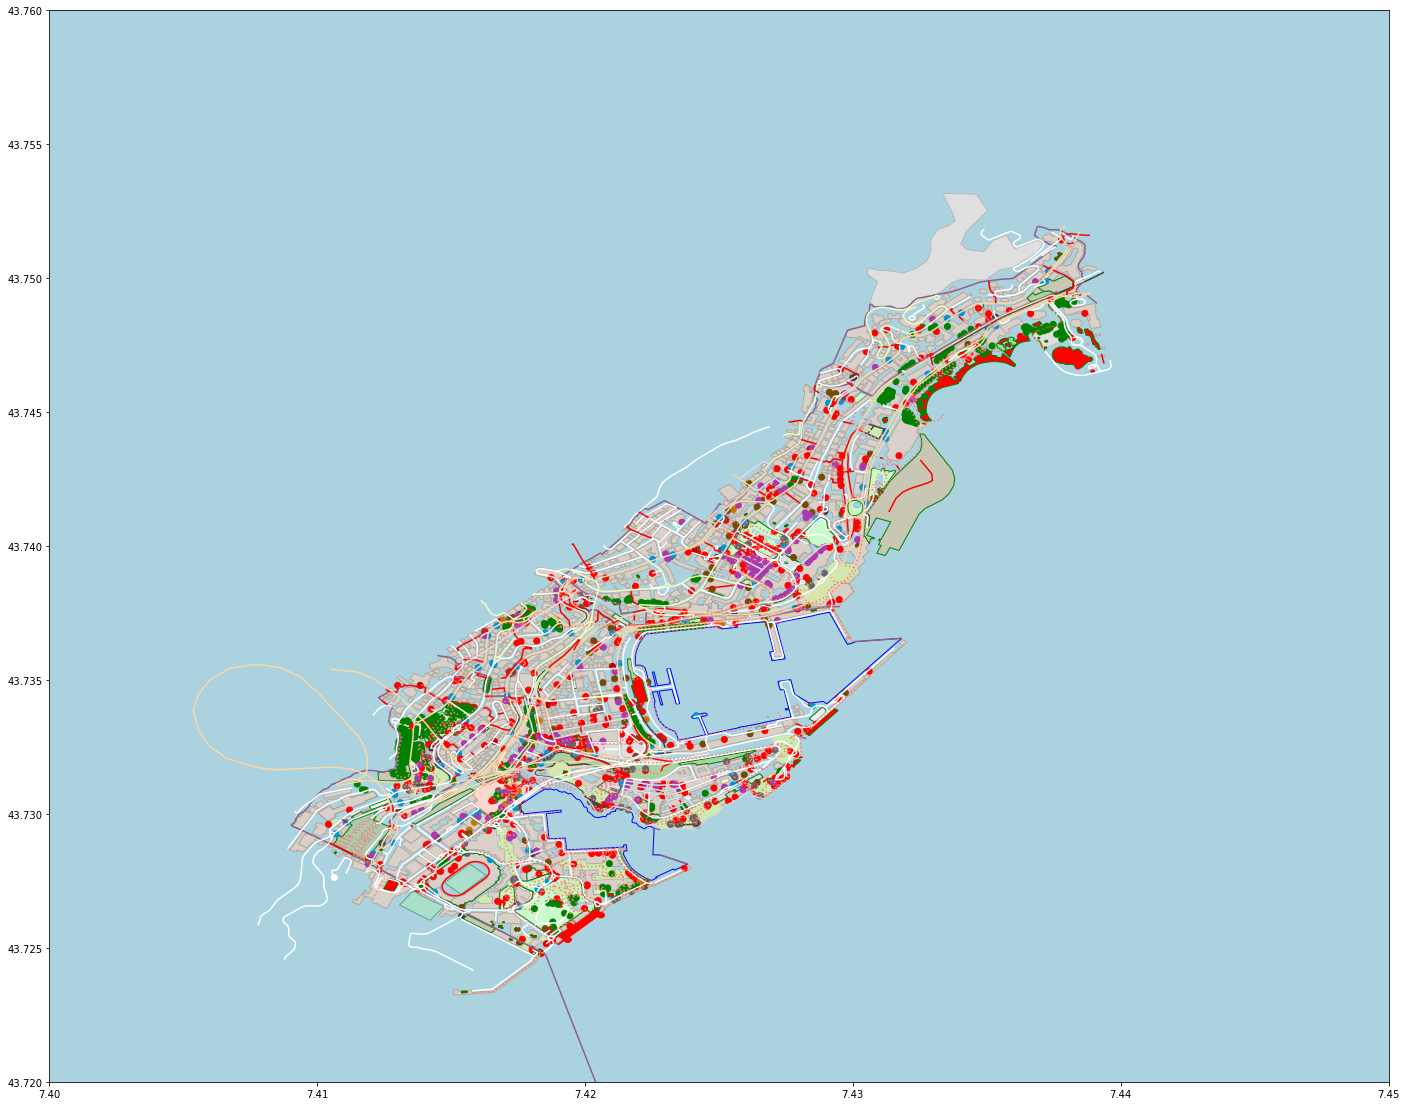

In [24]:
fig,ax = carto_plot(monaco, bottom=43.72, top=43.76, left=7.4, right=7.45)
ax.set_facecolor('#aad3df')